### ASI assessed exercise 2016/2017

#### student: <b>Gaballo</b> Alessandro

In [1]:
# keras and tensorflow are required
from keras.datasets import mnist
from keras.datasets import cifar10
import numpy  as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


 <b>Q1.</b> Download the MNIST and CIFAR10 datasets and import them.

In [2]:
(mnist_train, mnist_label_train), (mnist_test, mnist_label_test) = mnist.load_data()
(cifar_train, cifar_label_train), (cifar_test, cifar_label_test) = cifar10.load_data()

<b>Q2.</b> Comment on the distribution of class labels and the dimensionality of the input and how these may affect the analysis.

In [3]:
mnist_training_count, bins = np.histogram(mnist_label_train, bins=10)
mnist_test_count, bins = np.histogram(mnist_label_test, bins=10)

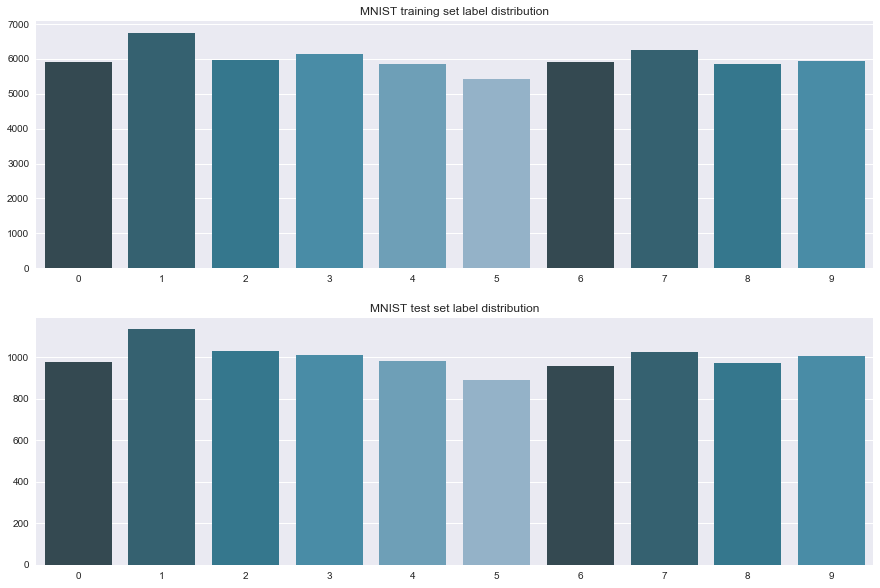

In [4]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("MNIST training set label distribution")
sns.barplot(np.arange(10), mnist_training_count, palette=sns.color_palette("PuBuGn_d"))
plt.xticks(np.arange(10))
plt.subplot(212)
plt.title("MNIST test set label distribution")
sns.barplot(np.arange(10), mnist_test_count, palette=sns.color_palette("PuBuGn_d"))
plt.xticks(np.arange(10))
plt.show()

TODO: comment on label distribution

In [5]:
cifar_training_count, bins = np.histogram(mnist_label_train, bins=10)
cifar_test_count, bins = np.histogram(mnist_label_test, bins=10)

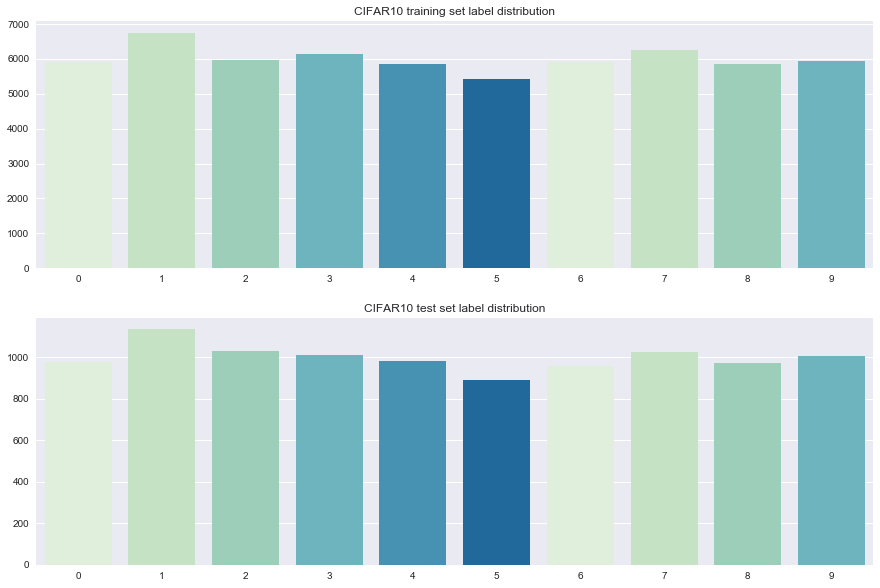

In [6]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("CIFAR10 training set label distribution")
sns.barplot(np.arange(10), cifar_training_count, palette=sns.color_palette("GnBu"))
plt.xticks(np.arange(10))
plt.subplot(212)
plt.title("CIFAR10 test set label distribution")
sns.barplot(np.arange(10), cifar_test_count, palette=sns.color_palette("GnBu"))
plt.xticks(np.arange(10))
plt.show()

TODO: comment on label distribution

<b>Q3.</b> Classification
    <ul><li> Implement the Naïve Bayes classifier</li></ul>

In [29]:
class NaiveBayesClassifier(object):
    def __init__(self):         
        print("Created new instance of Naive Bayes Classifier")
    
    def _prior(self, labels):
        label, counts = np.unique(labels, return_counts = True)
        priors = counts/len(labels)
        return dict(zip(label, priors))
    
    def fit(self, data, labels):
        #computing prior probabilities for different classes
        self.prior = self._prior(labels)
        
        # now we need to group all the images of each digit
        # digits_imgs contains the list of images(flattened) for each digit 
        digits_imgs = {label:[] for label in np.unique(labels)}
        for img, label in zip(data, labels):
            digits_imgs[label].append(img.flatten())

        
        # once we've grouped all the samples per digit we can compute the likelihood  
        for digit in digits_imgs:
            var = np.var(digits_imgs[digit], axis=0)
            self.var.append(np.array([v if v!=0 else self._min_var for v in var], dtype=np.float128))
            self.mean.append(np.array(np.mean(digit, axis=0), dtype=np.float128))
#             img = np.reshape(mean, (28,28))
#             if i%2 == 0:
#                 plt.figure(figsize=(15,5))
#                 plt.subplot(121)
#                 plt.imshow(img)
#             else:
#                 plt.subplot(122)
#                 plt.imshow(img)
#                 plt.show()
        
    def predict(self, data):
        def evaluate(mean, var, x):
            np.seterr(over='raise', under='raise')
#             print(x-mean)
#             print(-np.power((x-mean),2))
            return np.prod(np.float128(np.exp(-(x-mean)/(2*var)) / np.sqrt(2*np.pi*var)))

            #a =np.prod(np.exp(-np.power((x-mean),2)/(2*var))/(np.sqrt(2*np.pi*var)))
            #print(np.count_nonzero(a),len(a))
            #print(np.array(norm(loc=mean,scale=var).pdf(img.flatten()), dtype=np.float128))
            return
        
        pred_labels = []
        for img in data:
            probabilities = np.zeros((10,), dtype=np.float128)
            cumulative = np.float128(0)
            for i, (mean, var) in enumerate(zip(self.mean, self.var)):
                #p = np.array(norm(loc=mean,scale=var).pdf(img.flatten()), dtype=np.float128)
#                 v = like[:,1].reshape((28,28))
#                 p = np.array(norm(m,v).pdf(img), dtype=np.float128)
                evaluate(mean, var, np.array(img.flatten(), dtype=np.float128))
            break
#                     p_t = np.prod(p)
#                 probabilities[i] = p_t
#                 cumulative += p_t
#             pred_labels.append(np.argmax(probabilities/cumulative))
#         return pred_labels

In [30]:
c = NaiveBayesClassifier()
c.fit(mnist_train, mnist_label_train)

Created new instance of Naive Bayes Classifier
(784,)


In [30]:
from time import time
t0 = time()
pred =c.predict(mnist_test)
t1 = time()
print('{:.3f}'.format(t1-t0))


FloatingPointError: underflow encountered in exp

In [19]:
print(c.var)

[array([ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        4.2532853e-05,  0.00016616732,  2.8078329e-05,  0.001,
        2.1027595e-05,  0.0001570995,  3.5536635e-05,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  2.1832354e-06,  2.5959993e-07,  0.001,
        1.8756095e-05,  8.0347405e-05,  5.0258547e-06,  0.001,  0.001,
        2.1972538e-05,  0.00014526699,  0.00020100547,  5.1538027e-05,
        5.5418229e-05,  8.3974368e-05,  5.1391932e-07,  1.4994492e-05,
        4.8015604e-05,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  1.8317371e-05,
        2.5957637e-05,  0.0002